<a href="https://colab.research.google.com/github/Rayssa-Nunes/analise-atendimento-cliente/blob/main/Atendimento_ao_Cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atendimento ao Cliente

Questões a serem respondidas:

**1. Pergunta de negócio:**
O tempo de atendimento tem um impacto significativo na satisfação do cliente? Existe uma relação clara entre tempo de atendimento e Net Promoter Score (NPS)?


**2. Pergunta de negócio:**
Quais fatores afetam diretamente o NPS? Será que há relação entre tempo de atendimento, quantidade de reclamações, tempo de resolução e NPS?


**3. Pergunta de negócio:**
O sentimento expresso pelos clientes nos feedbacks pode ser um indicador confiável da resolução de problemas?


**4. Pergunta de negócio:**
Será que clientes que esperam menos tempo têm mais chances de ter seus problemas resolvidos? Podemos segmentar os tempos de espera para analisar essa relação?


**5. Pergunta de negócio:**
Os clientes que deixam feedbacks positivos realmente tendem a dar notas mais altas no NPS? Ou essa relação não é tão forte?


**6. Pergunta de negócio:**
Com base nas análises realizadas nos exercícios anteriores, quais ações a empresa AtendeBem pode tomar para melhorar a experiência do cliente e aumentar a satisfação?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_excel('área de atendimento.xlsx')
df.head()

,ID_Cliente,Tempo_Espera,Tempo_Resolucao,Satisfacao_Cliente,Canal_Atendimento,Tipo_Problema,Feedback_Sentimento,Media_NPS,Qtd_Reclamacoes,Problema_Solucionado
0,1,11,22,6,E-mail,Cobrança,Positivo,61,1,Sim
1,2,5,10,9,E-mail,Atendimento Ruim,Neutro,88,0,Não
2,3,21,41,3,Chat,Produto Defeituoso,Neutro,28,2,Sim
3,4,13,27,6,Redes Sociais,Produto Defeituoso,Negativo,55,1,Sim
4,5,16,34,4,Redes Sociais,Produto Defeituoso,Negativo,37,2,Não


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID_Cliente            1000 non-null   int64 
 1   Tempo_Espera          1000 non-null   int64 
 2   Tempo_Resolucao       1000 non-null   int64 
 3   Satisfacao_Cliente    1000 non-null   int64 
 4   Canal_Atendimento     1000 non-null   object
 5   Tipo_Problema         1000 non-null   object
 6   Feedback_Sentimento   1000 non-null   object
 7   Media_NPS             1000 non-null   int64 
 8   Qtd_Reclamacoes       1000 non-null   int64 
 9   Problema_Solucionado  1000 non-null   object
dtypes: int64(6), object(4)
memory usage: 78.3+ KB


## **Exercício 1:** Relação entre NPS e Tempo de Atendimento

### Contexto
O **NPS, ou Net Promoter Score**, é uma métrica utilizada para medir a **satisfação e lealdade dos clientes** em relação a uma empresa.

### Resultado

O gráfico de dispersão revela uma **relação inversamente proporcional entre o NPS e o tempo de espera**: à medida que o tempo de espera diminui, o NPS tende a aumentar e vice-versa. Além disso, observam-se valores discrepantes (outliers) que se distanciam do padrão geral observado.

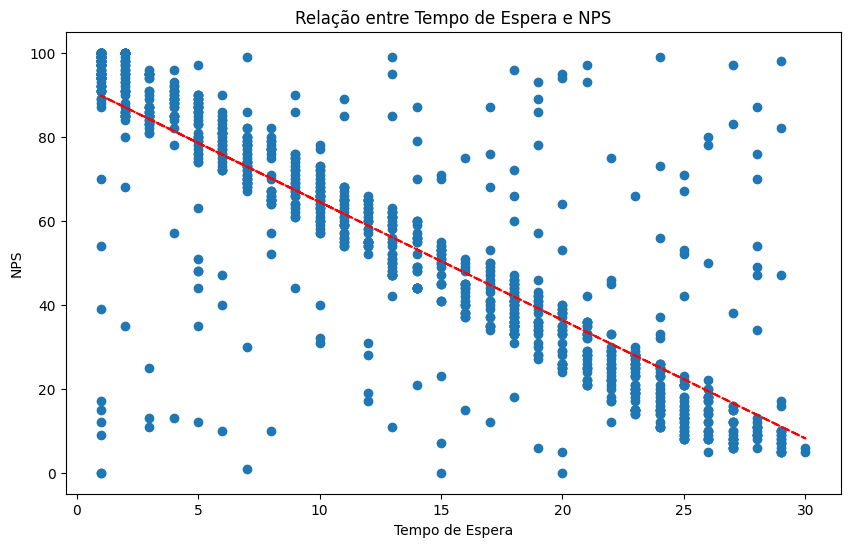

In [6]:
x = df['Tempo_Espera']
y = df['Media_NPS']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x, y)
plt.xlabel('Tempo de Espera')
plt.ylabel('NPS')
plt.title('Relação entre Tempo de Espera e NPS')
plt.plot(x, p(x), 'r--')
plt.show()

## **Exercício 2:** Cálculo da Correlação de Pearson

### Resultado

As correlações indicam:
- **NPS médio** se relaciona fortemente e **negativamente** com as demais variáveis: quanto menor o NPS, maior tendem a ser o tempo de espera, a quantidade de reclamações e o tempo de resolução.
- **Tempo de espera** apresenta correlação **forte e positiva** tanto com a **quantidade de reclamações** (0,80) quanto com o **tempo de resolução** (0,85)
- **Tempo de resolução** e **quantidade de reclamações** também se correlacionam fortemente (0,84), sugerindo que demoras na resolução aumentam o número de queixas.

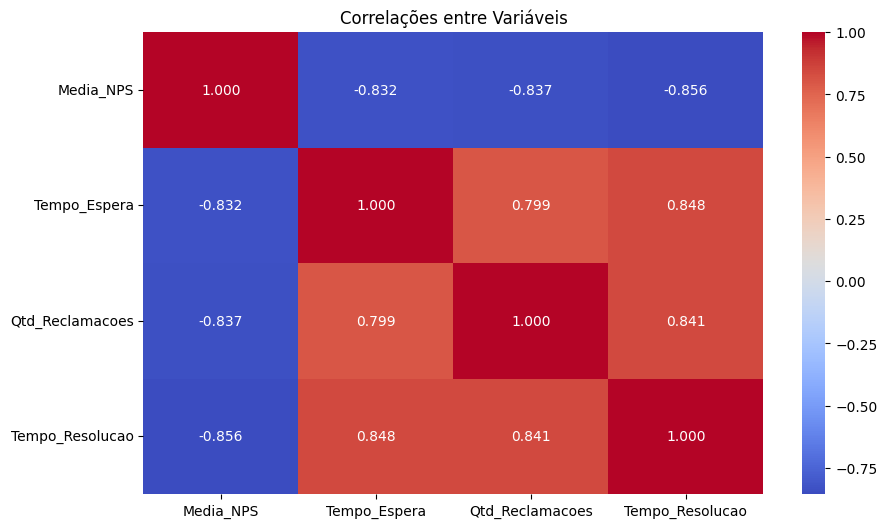

In [7]:
colunas_selecionadas = df[['Media_NPS', 'Tempo_Espera', 'Qtd_Reclamacoes', 'Tempo_Resolucao']]
correlacoes = colunas_selecionadas.corr()

sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlações entre Variáveis')
plt.show()

## **Exercício 3:** Information Value para Feedback e Solução do Problema

### Resultado

Utilizamos o **Valor de Informação (IV)** para avaliar o poder de predição de uma variável. Em resumo, quanto maior o IV, mais útil a variável é para prever o resultado desejado. O IV calculado entre **feedback de sentimento** e **problema solucionado** foi **0,006**, classificado como **baixo**. Isso indica que o sentimento expresso no feedback tem pouca relevância para prever se o problema foi resolvido, sugerindo que outros fatores merecem maior atenção.

In [8]:
def obter_iv(coluna1):
  # Contagem de Sim e Não por grupo
  contagem = df.groupby([coluna1, 'Problema_Solucionado'], observed=False).size().unstack(fill_value=0)

  # Totais
  total_sim = contagem['Sim'].sum()
  total_nao = contagem['Não'].sum()

  # Porcentagens
  porcentagem_sim = (contagem['Sim'] / total_sim)
  porcentagem_nao = (contagem['Não'] / total_nao)

  # Odds e log(odds)
  iv_por_grupo = (porcentagem_sim - porcentagem_nao) * np.log(porcentagem_sim / porcentagem_nao)

  # Soma total do IV
  iv_total = iv_por_grupo.sum()

  print(iv_por_grupo)
  print("\nSoma total do IV:", iv_total)

In [9]:
obter_iv('Feedback_Sentimento')

Feedback_Sentimento
Negativo    0.000026
Neutro      0.003323
Positivo    0.002737
dtype: float64

Soma total do IV: 0.0060869778866679165


## **Exercício 4:** Segmentação de Tempo de Espera e IV

### Resultado

O **Valor da Informação (IV)** obtido entre **tempo de espera** e **problema solucionado** foi **0,46**, classificado como **forte**. Isso indica que o tempo de espera é uma fator **relevante** na previsão da resolução do problema.

In [10]:
inicio = df['Tempo_Espera'].min()
fim    = df['Tempo_Espera'].max()

bins = list(np.arange(inicio, fim + 1, 5)) + [fim + 1]

# segmenta
df['Faixa_Tempo'] = pd.cut(
    df['Tempo_Espera'],
    bins=bins,
    labels=[f'{a}-{b-1}' for a, b in zip(bins[:-1], bins[1:])],
    include_lowest=True,
    right=False
)

# IV
obter_iv('Faixa_Tempo')

Faixa_Tempo
1-5      0.188471
6-10     0.048900
11-15    0.002572
16-20    0.140926
21-25    0.033522
26-30    0.048970
dtype: float64

Soma total do IV: 0.463361040610844


In [11]:
df[['Tempo_Espera', 'Faixa_Tempo']]

,Tempo_Espera,Faixa_Tempo
0,11,11-15
1,5,1-5
2,21,21-25
3,13,11-15
4,16,16-20
...,...,...
995,19,16-20
996,5,1-5
997,18,16-20
998,16,16-20


In [12]:
df.head()

,ID_Cliente,Tempo_Espera,Tempo_Resolucao,Satisfacao_Cliente,Canal_Atendimento,Tipo_Problema,Feedback_Sentimento,Media_NPS,Qtd_Reclamacoes,Problema_Solucionado,Faixa_Tempo
0,1,11,22,6,E-mail,Cobrança,Positivo,61,1,Sim,11-15
1,2,5,10,9,E-mail,Atendimento Ruim,Neutro,88,0,Não,1-5
2,3,21,41,3,Chat,Produto Defeituoso,Neutro,28,2,Sim,21-25
3,4,13,27,6,Redes Sociais,Produto Defeituoso,Negativo,55,1,Sim,11-15
4,5,16,34,4,Redes Sociais,Produto Defeituoso,Negativo,37,2,Não,16-20


In [13]:
df.tail()

,ID_Cliente,Tempo_Espera,Tempo_Resolucao,Satisfacao_Cliente,Canal_Atendimento,Tipo_Problema,Feedback_Sentimento,Media_NPS,Qtd_Reclamacoes,Problema_Solucionado,Faixa_Tempo
995,996,19,38,4,Telefone,Atendimento Ruim,Neutro,36,2,Não,16-20
996,997,5,5,8,Telefone,Produto Defeituoso,Negativo,83,0,Sim,1-5
997,998,18,39,10,E-mail,Atendimento Ruim,Negativo,96,0,Não,16-20
998,999,16,27,5,WhatsApp,Cobrança,Neutro,51,1,Não,16-20
999,1000,3,5,9,Chat,Atendimento Ruim,Neutro,90,0,Sim,1-5


## **Exercício 5:** Boxplot e R² entre NPS e Feedback

### Resultado

O gráfico apresenta métricas semelhantes entre o **feedback de sentimentos** e a **media NPS**. O **coeficiente de determinação (R² = 0.00081)** indica que menos de 0,1% da variação na média NPS é explicada dos feedbacks. Portanto, não há evidência de uma relação relevante entre essas duas variáveis.

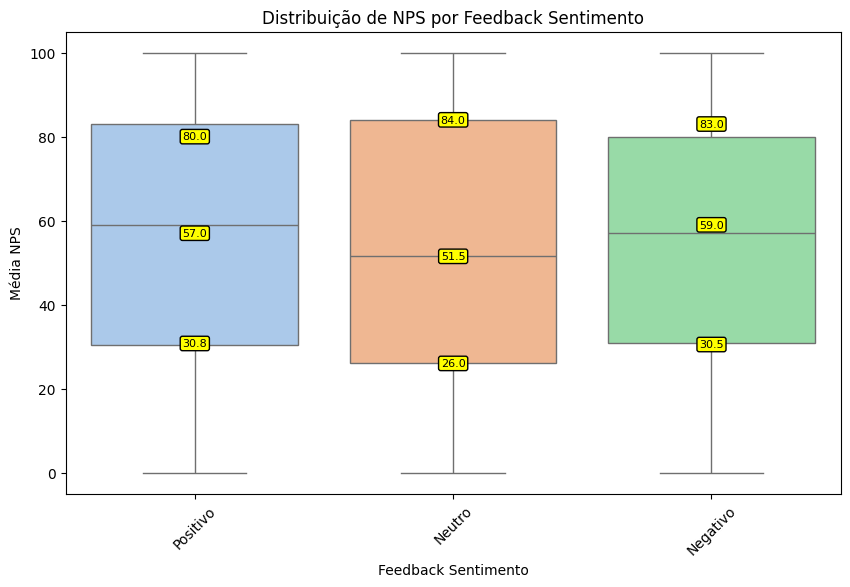

In [14]:
sns.boxplot(x='Feedback_Sentimento', y='Media_NPS', data=df, hue='Feedback_Sentimento', palette='pastel')

# Calcula os quartis por categoria
grupos = df.groupby('Feedback_Sentimento')['Media_NPS']
quartis = grupos.describe()[['25%', '50%', '75%']]

# Adiciona os textos no gráfico
for i, categoria in enumerate(quartis.index):
    valores = quartis.loc[categoria]
    for j, (label, valor) in enumerate(valores.items()):
        plt.text(i, valor, f'{valor:.1f}', ha='center', va='center', fontsize=8, color='black',
                 bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.2'))

plt.xticks(rotation=45)
plt.xlabel('Feedback Sentimento')
plt.ylabel('Média NPS')
plt.title('Distribuição de NPS por Feedback Sentimento')
plt.show()

In [32]:
coef_det = df.groupby('Feedback_Sentimento')['Media_NPS'].agg(
    contagem='count',
    variancia_pop=lambda x: np.var(x, ddof=0)
).reset_index()
coef_det

,Feedback_Sentimento,contagem,variancia_pop
0,Negativo,324,841.382716
1,Neutro,336,938.612209
2,Positivo,340,859.984256


In [33]:
variancia_total = df['Media_NPS'].var(ddof=0)
variancia_total

881.0937440000013

In [35]:
variancia_ponderada = np.average(coef_det['variancia_pop'], weights=coef_det['contagem'])
variancia_ponderada

np.float64(880.3763494397767)

In [36]:
r2 = 1 - ( variancia_ponderada / variancia_total)
print(f'R² = {r2}')

R² = 0.0008142091180532995


## **Exercício 6:** Plano de Ação para Melhorar o Atendimento ao Cliente

Com base nos dados analisados, identificamos que um alto índice de NPS está diretamente relacionado a um atendimenro ágil e de excelência. Quanto menor o tempo de resposta, maior tende a ser a satisfação do cliente.

**Plano de Ação:**
- **Capacitação contínua** da equipe para garantir agilidade e qualidade no atendimento
- **Automatização de respostas** para perguntas recorrentes e simples, visando eficiência
- **Monitoramento em tempo real**, com recursos como alertas de tempo limite, dashboards dinâmicos e reuniões de acompanhamento